### Scipy Distribution Demo

For Matthew McNamara - Feb 3, 2022

#### Optimizer Benchmarking Needs to Account for Hyperparameter Tuning:

From Table 2: Optimizers evaluated. For each hyperparameter, we calibrated a 'prior distribution' to give good results across tasks. 
$\mathcal{U}[a, b]$ is the continuous uniform distribution on $[a, b]$. 
Log-uniform($a$, $b$) is a distribution whose logarithm is $\mathcal{U}[a, b]$.
Log-normal($\mu$,$\sigma$) is a distribution whose logarithm is $\mathcal{N}(\mu, \sigma^2)$.

Adam parameters and cross-task priors are:
 * Learning rate: Log-normal(-2.69, 1.42)
 * $\beta_1, \beta_2$: 1 - Log-uniform(-5, -1)
 * ε: Log-uniform(-8, 0)

https://arxiv.org/pdf/1910.11758.pdf

In [1]:
# scipy imports
import scipy
from scipy.stats import loguniform, uniform, lognorm, norm

In [2]:
import matplotlib.pyplot as plt
import numpy as np

#### Learning rate

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html

"A common parametrization for a lognormal random variable Y is in terms of the mean, mu, and standard deviation, sigma, of the unique normally distributed random variable X such that exp(X) = Y. This parametrization corresponds to setting s = sigma and scale = exp(mu)."



In [3]:
mu, sigma = -2.69, 1.42
s = sigma
scale = np.exp(mu)
rv = lognorm(s=s, scale=scale)
rv

In [4]:
np.exp(mu), mu

(0.06788093937176144, -2.69)

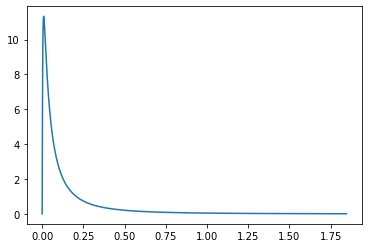

In [5]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(rv.ppf(0), rv.ppf(0.99), 1000)
y = rv.pdf(x)
ax.plot(x, y)

#ax.set_yscale('log')  # uncomment if you want to see the weight of the distribution more clearly

plt.show()

In [6]:
# this is what a uniform search over the space would produce
np.linspace(rv.ppf(0), rv.ppf(0.99), 10)

array([0.        , 0.2051917 , 0.41038341, 0.61557511, 0.82076682,
       1.02595852, 1.23115022, 1.43634193, 1.64153363, 1.84672533])

In [7]:
# here are the values that would be produced if we used Random Search (like the paper) with a budget of 10
np.sort(rv.rvs(size=10))

array([0.00700783, 0.00747721, 0.00799736, 0.02124428, 0.02745207,
       0.05070588, 0.08109206, 0.09686448, 0.16864326, 0.28249289])

#### $\beta$ parameters

Here, we have to use the loguniform distribution.

In [8]:
np.exp(-5), np.exp(-1)

(0.006737946999085467, 0.36787944117144233)

In [9]:
rv = loguniform(np.exp(-5), np.exp(-1))
rv

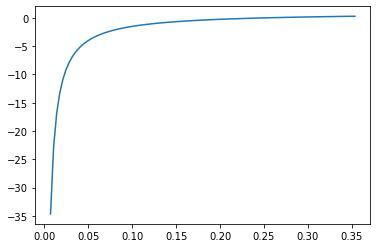

In [10]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)
y = 1 - rv.pdf(x)
ax.plot(x, y)


plt.show()

In [11]:
# this is what a uniform search over the space would produce
1 - np.linspace(rv.ppf(0), rv.ppf(1), 10)

array([0.99326205, 0.95313522, 0.91300839, 0.87288155, 0.83275472,
       0.79262789, 0.75250106, 0.71237422, 0.67224739, 0.63212056])

In [12]:
# here are the values that would be produced if we used Random Search (like the paper) with a budget of 10
1 - np.sort(rv.rvs(size=10))

array([0.99085731, 0.98976449, 0.97519771, 0.95985265, 0.93720701,
       0.93366277, 0.90805917, 0.89368935, 0.80641242, 0.77010052])